### Kaggle Competition | Titanic Machine Learning from Disaster

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this contest, we ask you to complete the analysis of what sorts of people were likely to survive.  In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

>This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

From the competition [homepage](http://www.kaggle.com/c/titanic-gettingStarted).


### Goal for this Notebook:
Make a simple analysis of the Titanic disaster in Python using a full complement of PyData utilities.

#### Required Libraries:
* [NumPy](http://www.numpy.org/)
* [IPython](http://ipython.org/)
* [Pandas](http://pandas.pydata.org/)
* [SciKit-Learn](http://scikit-learn.org/stable/)
* [SciPy](http://www.scipy.org/)
* [Matplotlib](http://matplotlib.org/)

***The competition's website is located on [Kaggle.com](http://www.kaggle.com/c/titanic-gettingStarted).***

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Data Handling
#### Read data (training set) in using pandas:

In [2]:
df = pd.read_csv('train.csv')

Show an overview of our data: 

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Learn more about the data:

Above is a summary of data contained in a `Pandas` `DataFrame`. Think of a `DataFrame` as a Python's super charged version of the workflow in an Excel table. As you can see the summary holds quite a bit of information. First, it lets us know we have 891 observations, or passengers, to analyze here.

Next it shows us all of the columns in `DataFrame`. Each column tells us something about each of our observations, like their `name`, `sex` or `age`. These colunms  are called a features of our dataset. You can think of the meaning of the words column and feature as interchangeable for this notebook. 

After each feature it lets us know how many values it contains. While most of our features have complete data on every observation, like the `survived` feature here: 

    survived    891  non-null values 

some are missing information, like the `age` feature: 

    age         714  non-null values 

These missing values are represented as `NaN`s.

### Take care of missing values:
The features `ticket` and `cabin` have many missing values and so can’t add much value to our analysis. To handle this we will drop them from the dataframe to preserve the integrity of our dataset. Drop waste features.

Also remove NaN values from each remaining column / feature.

Now we have a clean and tidy dataset that is ready for analysis. 



In [4]:
# Remove ticket and cabin features
df = df.drop(['Ticket', 'Cabin'], axis=1)
# Remove NaN values
df = df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [5]:
# Don't touch this cell
assert "ticket" not in df.columns
assert "cabin" not in df.columns
assert df.isna().sum().sum() == 0

For a detailed look at how to use pandas for data analysis, the best resource is Wes Mckinney's [book](http://shop.oreilly.com/product/0636920023784.do). Additional interactive tutorials that cover all of the basics can be found [here](https://bitbucket.org/hrojas/learn-pandas) (they're free).  If you still need to be convinced about the power of pandas check out this wirlwhind [look](http://wesmckinney.com/blog/?p=647) at all that pandas can do. 

### Let's take a Look at our data graphically:

Plot 5 graphs in this section:


1.   Plots a bar graph of those who survived vs those who did not. 
2.   Plots a Scatterplot of Survived distribution by Age
3.   Plots a bar graph of Class distribution
4.   Plots kernel density estimate of the passengers age separately for all 3 classes
5.   Plots a bar graph of passengers per boarding location



In [8]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

#plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
plt.title("Distribution of Survival, (1 = Survived)") 
# plots a bar graph of those who surived vs those who did not.  
status = ["Not Survived", "Survived"]
amounts = df.Survived.value_counts()
sns.barplot(x=status, y=amounts)

#plots a Scatterplot of Survived distribution by Age
ax2 = plt.subplot2grid((2,3),(0,1))
plt.title("Survival by Age,  (1 = Survived)")
ages = np.sort(pd.unique(df.Age))
percentage = [100 * len(df[(df.Age == age) & (df.Survived == 1)]) / (df.Age == age).sum() for age in ages]
ax2.set_ylabel("Percentage")
ax2.set_xlabel("Age")
sns.scatterplot(x=ages, y=percentage)

#plots a bar graph of Class distribution
ax3 = plt.subplot2grid((2,3),(0,2))
plt.title("Class Distribution")
pclasses = ["1", "2", "3"]
survived = [df[(df.Pclass==int(cls)) & (df.Survived==1)].shape[0] for cls in pclasses]
not_survived = [df[(df.Pclass==int(cls)) & (df.Survived==0)].shape[0] for cls in pclasses]
ax3.bar(pclasses, survived, color='orange', bottom=not_survived, label="Survived")
ax3.bar(pclasses, not_survived, color='blue', label="Not survived")
ax3.legend(loc="upper left")


#plots a kernel density estimate of the passengers's age separately for all 3 classes
ax4 = plt.subplot2grid((2,3),(1,0), colspan=2)
plt.title("Age Distribution within classes")
sns.kdeplot(data=df, x="Age", hue="Pclass", common_norm=False, palette="crest")

#plots a bar graph of passengers per boarding location
ax5 = plt.subplot2grid((2,3),(1,2))
plt.title("Passengers per boarding location")
boards = pd.unique(df.Embarked)
survived = [df[(df.Embarked==board) & (df.Survived==1)].shape[0] for board in boards]
not_survived = [df[(df.Embarked==board) & (df.Survived==0)].shape[0] for board in boards]
ax5.bar(boards, survived, color='orange', bottom=not_survived, label="Survived")
ax5.bar(boards, not_survived, color='blue', label="Not survived")
ax5.legend(loc="upper right")

### Exploratory Visualization:

The point of this competition is to predict if an individual will survive based on the features in the data like:
 
 * Traveling Class (called pclass in the data)
 * Sex 
 * Age
 * Fare Price

Let’s see if we can gain a better understanding of who survived and died. 


First plot a bar graph of those who Survived Vs. Those who did not.


<AxesSubplot:ylabel='Survived'>

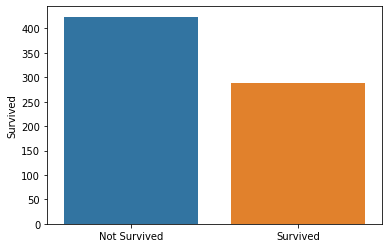

In [9]:
status = ['Not Survived', 'Survived']
amounts = df.Survived.value_counts()
sns.barplot(x=status, y=amounts)

### Next tease more structure out of the data,
### Break the previous graph down by gender


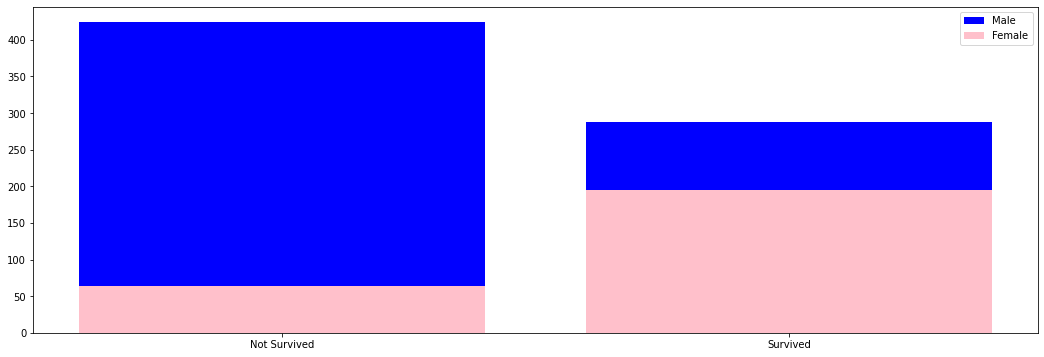

<AxesSubplot:title={'center':'Proportions of survival by gender'}>

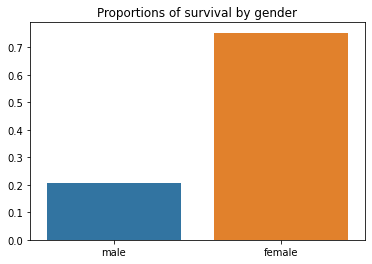

In [10]:
fig = plt.figure(figsize=(18,6))

# create a plot of two subsets, male and female, of the survived variable.
# After that call value_counts() so it can be easily plotted as a bar graph. 
# you can use kind='barh' argument. It is just a horizontal bar graph

# Next adjust graph to display the proportions of survival by gender

genders = pd.unique(df.Sex)
survival = pd.unique(df.Survived)

gender_split = [[len(df[(df.Sex == gender) & (df.Survived == surv)]) for surv in survival] for gender in genders]

plt.bar(status, gender_split[0], color="blue", bottom= gender_split[1], label="Male")
plt.bar(status, gender_split[1], color="pink", label="Female")
plt.legend(loc="upper right")
plt.show()

proportions = [(100 * len(df[(df.Sex == gender) & (df.Survived == 1)]) / (df.Sex == gender).sum())/100 for gender in genders]
plt.title("Proportions of survival by gender") 
sns.barplot(x=genders, y=proportions)

If we look at the first graph we can see that amount of people who not survived is ~150 people more than those, who survived. But if we break down by gender we can see that most of survivors are women, and most of those who didn't survive are men. Therefore we can see that women have much more chances to survive

Add your summaryabout recieved data for raw value counts and proportionally

#### Try to go down even further:
Can we capture more of the structure by using Pclass? Here try to bucket classes as lowest class or any of the high classes (classes 1 - 2). 3 is lowest class. Break it down by Gender and what Class they were traveling in.


Text(0.5, 0, 'Survived')

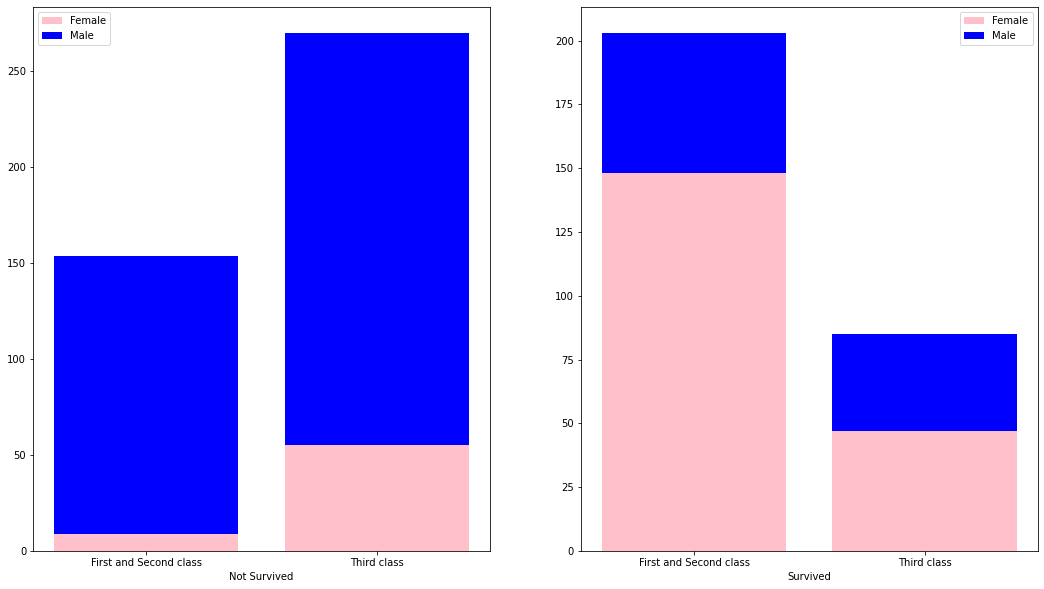

In [11]:
fig = plt.figure(figsize=(18, 10))
plt.subplot2grid((1,2), (0, 0))
x_titles = ["First and Second class", "Third class"]

female_not_survived = [df[(df.Sex == 'female') & (df.Survived==0) & (df.Pclass <= 2)].shape[0], 
                       df[(df.Sex=='female') & (df.Survived==0) &(df.Pclass == 3)].shape[0]]
male_not_survived = [df[(df.Sex == 'male') & (df.Survived==0) & (df.Pclass <= 2)].shape[0], 
                     df[(df.Sex=='male') & (df.Survived==0) &(df.Pclass == 3)].shape[0]]
female_survived = [df[(df.Sex == 'female') & (df.Survived==1) & (df.Pclass <= 2)].shape[0], 
                   df[(df.Sex == 'female') & (df.Survived==1) & (df.Pclass == 3)].shape[0]]
male_survived = [df[(df.Sex == 'male') & (df.Survived==1) & (df.Pclass <= 2)].shape[0], 
                 df[(df.Sex == 'male') & (df.Survived==1) & (df.Pclass == 3)].shape[0]]


not_survived_split_by_gender = list([female_not_survived, male_not_survived])
survived_split_by_gender = list([female_survived, male_survived])

plt.bar(x_titles, not_survived_split_by_gender[0], color='pink', label='Female')
plt.bar(x_titles, not_survived_split_by_gender[1], color='blue', bottom= not_survived_split_by_gender[0], label='Male')
plt.legend(loc="upper left")
plt.xlabel("Not Survived")

plt.subplot2grid((1,2), (0, 1))

plt.bar(x_titles, survived_split_by_gender[0], color='pink', label='Female')
plt.bar(x_titles, survived_split_by_gender[1], color='blue', bottom= survived_split_by_gender[0], label='Male')
plt.legend(loc="upper right")
plt.xlabel("Survived")

Try to get a conclusions of the recieved data

We can see that people from First and Second classes have more chance to survive than people from Third class. Also we can see that amount of survived women from First and Second class more than survived men from the same classes. 

## Model train and evaluation


For all model at the end, additionaly generate:
Normalized Confusion matrix as:
```
		                 Predicted
                     Survive	Non-Survive
Actual    Survive        0.7       0.3
          Non-Survive    0.2       0.8
```
And metrics:
```
          Metrics
Recall    0.2232
Precision 0.0597
Accuracy  0.2100
F1 score  0.0398
```

## Supervised Machine Learning
#### Logistic Regression:



Task is to predict a binary outcome. That is, it wants to know whether some will die, (represented as a 0), or survive, (represented as 1). A good place to start is to calculate the probability that an individual observation, or person, is likely to be a 0 or 1. That way we would know the chance that someone survives, and could start making somewhat informed predictions. If we did, we'd get results like this:: 

![pred](https://raw.github.com/agconti/kaggle-titanic/master/images/calc_prob.png) 

(*Y axis is the probability that someone survives, X axis is the passenger’s number from 1 to 891.*)

While that information is useful it doesn’t let us know whether someone ended up alive or dead. It just lets us know the chance that they will survive or die. We still need to translate these probabilities into the binary decision we’re looking for. But how? We could arbitrarily say that our survival cutoff is anyone with a probability of survival over 50%. In fact, this tactic would actually perform pretty well for our data and would allow you to make decently accurate predictions. Graphically it would look something like this:

![predwline](https://raw.github.com/agconti/kaggle-titanic/master/images/calc_prob_wline.png)

What are the odds that setting that cutoff at 50% works? Maybe 20% or 80% would work better. Clearly we need a more exact way to make that cutoff. What can save the day? In steps the **Logistic Regression**. 

A logistic regression follows the all steps we took above but mathematically calculates the cutoff, or decision boundary (as stats nerds call it), for you. This way it can figure out the best cut off to choose, perhaps 50% or 51.84%, that most accurately represents the training data.

Below, write down the process of creating a Logitist regression model with `LogisticRegression`, training it on the data, and examining its performance.

In [12]:
# Plot Predictions Vs Actual

o_h_v = OneHotEncoder(handle_unknown = "ignore")
scaler = StandardScaler()

col_s = ["Pclass", "Sex", "Embarked"]

data = o_h_v.fit_transform(df[col_s]).toarray()
data = np.hstack((df.drop(col_s + ["Survived", "Name", "PassengerId", "Age", "Fare"], axis=1).to_numpy(), data))

y_train = list(df.Survived)
x_train = scaler.fit_transform(data)
x_train

array([[ 0.52251079, -0.50678737, -0.59032605, ..., -0.47261792,
        -0.20232566,  0.53403984],
       [ 0.52251079, -0.50678737,  1.69397911, ...,  2.11587407,
        -0.20232566, -1.87251946],
       [-0.55271372, -0.50678737, -0.59032605, ..., -0.47261792,
        -0.20232566,  0.53403984],
       ...,
       [-0.55271372, -0.50678737,  1.69397911, ..., -0.47261792,
        -0.20232566,  0.53403984],
       [-0.55271372, -0.50678737,  1.69397911, ...,  2.11587407,
        -0.20232566, -1.87251946],
       [-0.55271372, -0.50678737, -0.59032605, ..., -0.47261792,
         4.94252683, -1.87251946]])

In [13]:
df_test = pd.read_csv("test.csv")
surv_values = pd.read_csv("gender_submission.csv")
test_data = pd.concat([surv_values, df_test], axis = 1)
test_data = test_data.drop(["Ticket", "Cabin", "PassengerId"], axis=1)
test_data = test_data.dropna(subset = ["Age", "Embarked", "Fare"])
test_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
409,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,13.7750,S
411,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,90.0000,Q
412,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,7.7750,S
414,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C


In [14]:
data = o_h_v.fit_transform(test_data[col_s]).toarray()
data = np.hstack((test_data.drop(col_s + ["Survived", "Name", "Age", "Fare"], axis=1).to_numpy(), data))

y_test = test_data.Survived
x_test = scaler.fit_transform(data)
x_test

array([[-0.55327231, -0.49211953, -0.64853748, ..., -0.57386172,
         3.74772658, -1.47739376],
       [ 0.59130978, -0.49211953, -0.64853748, ..., -0.57386172,
        -0.26682843,  0.67686762],
       [-0.55327231, -0.49211953, -0.64853748, ..., -0.57386172,
         3.74772658, -1.47739376],
       ...,
       [-0.55327231, -0.49211953, -0.64853748, ..., -0.57386172,
        -0.26682843,  0.67686762],
       [-0.55327231, -0.49211953,  1.54193094, ...,  1.74258009,
        -0.26682843, -1.47739376],
       [-0.55327231, -0.49211953, -0.64853748, ..., -0.57386172,
        -0.26682843,  0.67686762]])

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

def model_test(model, x_train, y_train, x_test, y_test):
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    confusion = confusion_matrix(y_test, y_pred)
    cmn = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cmn, annot=True, labels=[1,0], xticklabels=["Survived", "Not Survived"], 
                yticklabels=["Survived", "Not Survived"], cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(classification_report(y_test, y_pred))

AttributeError: 'QuadMesh' object has no property 'labels'

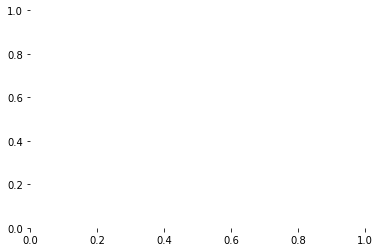

In [17]:
logistic_regression_classifier = LogisticRegression()
model_test(logistic_regression_classifier, x_train, y_train, x_test, y_test)

### Support Vector Machine (SVM)


The logit model showed exactly where to draw our decision boundary or our 'survival cut off'. A linear line is okay, but can prediction be better? Perhaps a more complex decision boundary like a wave, circle, or maybe some sort of strange polygon would describe the variance observed in our sample better than a line.

Below implement a SVM model based on `sklearn.svm.SVC` and examining the results after the SVM transforms an equation into three different mathematical plains. The first is linear, and is similar to our logic model. Next is an exponential, polynomial, transformation and finally a blank transformation.


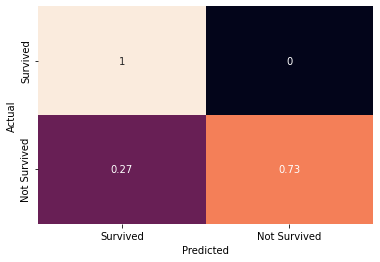

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       204
           1       1.00      0.73      0.85       127

    accuracy                           0.90       331
   macro avg       0.93      0.87      0.88       331
weighted avg       0.91      0.90      0.89       331



In [34]:
support_vector_machine  = SVC(probability = True)
model_test(support_vector_machine, x_train, y_train, x_test, y_test)

### Random Forest

the Random Forest technique is a form of non-parametric modeling that does away with all those equations created above, and uses raw computing power and a clever statistical observation to tease the structure out of the data. 

**How do they work?** A random forest algorithm randomly generates many extremely simple models to explain the variance observed in random subsections of our data. These models are like appraisal guesses. They are all awful individually. Really awful. But once they are averaged, they can be powerful predictive tools. The averaging step is the secret sauce. While the vast majority of those models were extremely poor; they were all as bad as each other on average. So when their predictions are averaged together, the bad ones average their effect on our model out to zero. The thing that remains, *if anything*, is one or a handful of those models have stumbled upon the true structure of the data.

Below implement your model of random forest with `RandomForestClassifier`, generating predictions form the resulting model, and then scoring the results.

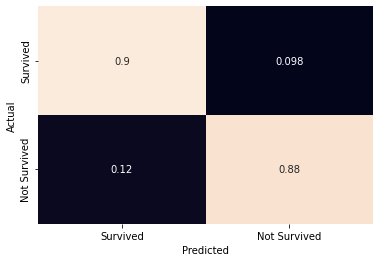

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       204
           1       0.85      0.88      0.86       127

    accuracy                           0.89       331
   macro avg       0.89      0.89      0.89       331
weighted avg       0.90      0.89      0.89       331



In [35]:
random_forest = RandomForestClassifier()
model_test(random_forest, x_train, y_train, x_test, y_test)

### K-nearest Neighbors Algorithm

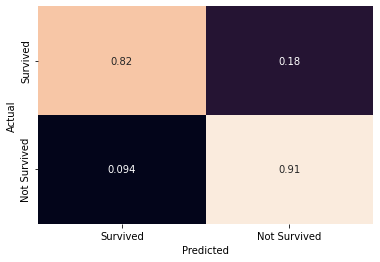

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       204
           1       0.76      0.91      0.83       127

    accuracy                           0.85       331
   macro avg       0.85      0.86      0.85       331
weighted avg       0.87      0.85      0.86       331



In [36]:
k_nearest_neighbors_algorithm = KNeighborsClassifier()
model_test(k_nearest_neighbors_algorithm, x_train, y_train, x_test, y_test)

### Decision Tree Classifier

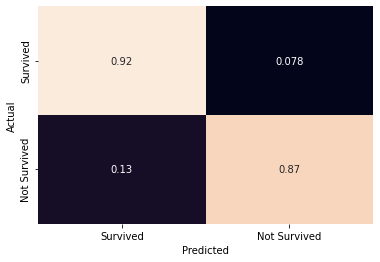

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       204
           1       0.87      0.87      0.87       127

    accuracy                           0.90       331
   macro avg       0.90      0.90      0.90       331
weighted avg       0.90      0.90      0.90       331



In [37]:
decision_tree_classifier = DecisionTreeClassifier()
model_test(decision_tree_classifier, x_train, y_train, x_test, y_test)

# Additional tasks

*   Plot ROC curve for implemented models
*   Implement prediction using another model, such as the k-nearest neighbors algorithm, decision tree classifier, gaussian naive bayes, neural network etc. Or maybe try to use sklearn.model_selection.GridSearchCV based on already implemented models.





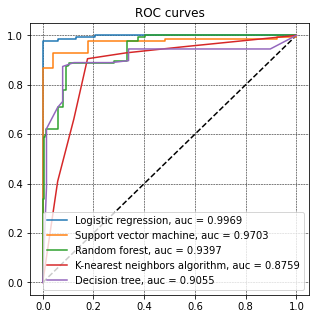

In [38]:
from sklearn.metrics import roc_curve, auc

log_fpr, log_tpr, thershold = roc_curve(y_test, logistic_regression_classifier.predict_proba(x_test)[::, 1])
swm_fpr, swm_tpr, thershold = roc_curve(y_test, support_vector_machine.predict_proba(x_test)[::, 1])
rf_fpr, rf_tpr, thershold = roc_curve(y_test, random_forest.predict_proba(x_test)[::, 1])
kna_fpr, kna_tpr, thershold = roc_curve(y_test, k_nearest_neighbors_algorithm.predict_proba(x_test)[::, 1])
dt_fpr, dt_tpr, thershold = roc_curve(y_test, decision_tree_classifier.predict_proba(x_test)[::, 1])


plt.figure (figsize = (5, 5))
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.plot (log_fpr, log_tpr, label = "Logistic regression, auc = %0.4f"%(auc(log_fpr, log_tpr)))
plt.plot (swm_fpr, swm_tpr, label = "Support vector machine, auc = %0.4f"%(auc(swm_fpr, swm_tpr)))
plt.plot (rf_fpr, rf_tpr, label = "Random forest, auc = %0.4f"%(auc(rf_fpr, rf_tpr)))
plt.plot (kna_fpr, kna_tpr, label = "K-nearest neighbors algorithm, auc = %0.4f"%(auc(kna_fpr, kna_tpr)))
plt.plot (dt_fpr, dt_tpr, label = "Decision tree, auc = %0.4f"%(auc(dt_fpr, dt_tpr)))


plt.title("ROC curves")
plt.legend()
plt.show()